In [11]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import warnings
data=pd.read_csv('C:/Users/khb10/Downloads/mnist_dataset/mnist_train.csv')

In [33]:
data = np.array(data)                          #데이터 배열로 만들기
m,n = data.shape                               #60000,785
np.random.shuffle(data)                        #train/valid 나누기 전에 섞는거

data_val = data[0:1000].T                   #0~999개의 데이터는 validation dataset으로 
Y_val = data_val[0]                            #transpose를 안해주면 0~255까지의 범위로 출력됨(간편하게 사용)
X_val = data_val[1:n]
X_val = X_val / 255.

data_train = data[1000:m].T                    #1000개 데이터 ~ 끝까지 -> train set
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255.
_,m_train = X_train.shape

[[9 7 7 ... 5 5 5]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]


In [19]:
X_train[:, 0].shape

(784,)

In [21]:
def init_params():                                                   #초기 파라미터 설정, 랜덤값 부여
    W1 = np.random.rand(10,784)-0.5                                #28*28픽셀 = 784, 0~9까지 10개의 클래스
    b1 = np.random.rand(10, 1)-0.5                                  
    W2 = np.random.rand(10, 10)-0.5
    b2 = np.random.rand(10, 1)-0.5
    return W1, b1, W2, b2

def ReLU(Z):                                                        #ReLU
    return np.maximum(0,Z)
    
def softmax(Z):                                                    #Softmax
    result = np.exp(Z) / sum(np.exp(Z))
    
    return result

def forward_prop(W1, b1, W2, b2, X):                               #순전파
    Z1 = W1.dot(X) + b1                                            #Z1: first layer, W1의 내적
    A1 = ReLU(Z1)
    Z2= W2.dot(A1)+b2                                              #Z2: second layer
    A2 = softmax(Z2)
    return Z1, A1, Z2, A2

def one_hot(Y):
    one_hot_Y = np.zeros((Y.size, Y.max() +1))                 #Y.size = m, Y.max()+1=출력 클래스
    one_hot_Y[np.arange(Y.size), Y] = 1
    one_hot_Y = one_hot_Y.T
    return one_hot_Y

def deriv_ReLU(Z):                                              #ReLU의 양수부분만 사용
    return Z>0

def back_prop(Z1, A1, Z2, A2, W1,W2, X, Y):                       #역전파
     m = Y.size
    one_hot_Y = one_hot(Y)
    dZ2 = A2-one_hot_Y
    dW2 = 1 / m * dZ2.dot(A1.T)
    db2 = 1 / m *np.sum(dZ2)
    dZ1 = W2.T.dot(dZ2) * deriv_ReLU(Z1)
    dW1 = 1 / m * dZ1.dot(X.T)
    db1 = 1 / m * np.sum(dZ1)
    return dW1, db1, dW2, db2

def update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha):
    W1 = W1-alpha *dW1
    b1 = b1-alpha * db1
    W2 = W2 - alpha*dW2
    b2 = b2 - alpha*db2
    return W1, b1, W2, b2

IndentationError: unindent does not match any outer indentation level (<tokenize>, line 34)

In [22]:
def get_predictions(A2):
    return np.argmax(A2,0)                             #argmax: 가장 큰 원소의 인덱스 반환

def get_accuracy(predictions, Y):                      #정확도 계산
    print(predictions, Y)
    return np.sum(predictions == Y) /Y.size
print(Y_train.size)

def gradient_descent(X, Y, iterations, alpha):
    W1, b1, W2, b2 = init_params()
    for i in range(iterations):
        Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
        dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
        W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
        if (i%10==0):
            print("Iteration: ", i)
            print("Accuracy: ", get_accuracy(get_predictions(A2), Y))
            
    return W1, b1, W2, b2

59000


In [23]:
iterations = 300
alpha = 0.1
X = X_train
Y = Y_train
W1, b1, W2, b2 = init_params()
for i in range(iterations):
    Z1, A1, Z2, A2 = forward_prop(W1, b1, W2, b2, X)
    dW1, db1, dW2, db2 = back_prop(Z1, A1, Z2, A2, W1, W2, X, Y)
    W1, b1, W2, b2 = update_params(W1, b1, W2, b2, dW1, db1, dW2, db2, alpha)
    if (i%10==0):
        print("Iteration: ", i)
        print("Accuracy: ", get_accuracy(get_predictions(A2), Y))

Iteration:  0
[8 8 8 ... 8 8 1] [8 0 5 ... 9 8 7]
Accuracy:  0.10167796610169491
Iteration:  10
[3 4 9 ... 4 0 7] [8 0 5 ... 9 8 7]
Accuracy:  0.22077966101694915
Iteration:  20
[8 4 5 ... 4 0 7] [8 0 5 ... 9 8 7]
Accuracy:  0.29133898305084743
Iteration:  30
[8 0 0 ... 4 0 7] [8 0 5 ... 9 8 7]
Accuracy:  0.3504915254237288
Iteration:  40
[8 0 0 ... 4 0 7] [8 0 5 ... 9 8 7]
Accuracy:  0.3962372881355932
Iteration:  50
[8 0 0 ... 4 0 7] [8 0 5 ... 9 8 7]
Accuracy:  0.44277966101694916
Iteration:  60
[8 0 0 ... 4 0 7] [8 0 5 ... 9 8 7]
Accuracy:  0.4892542372881356
Iteration:  70
[8 0 0 ... 4 0 7] [8 0 5 ... 9 8 7]
Accuracy:  0.531593220338983
Iteration:  80
[8 0 0 ... 4 0 7] [8 0 5 ... 9 8 7]
Accuracy:  0.5641186440677967
Iteration:  90
[8 0 0 ... 4 0 7] [8 0 5 ... 9 8 7]
Accuracy:  0.5927966101694915
Iteration:  100
[8 0 5 ... 4 8 7] [8 0 5 ... 9 8 7]
Accuracy:  0.6160508474576272
Iteration:  110
[8 0 5 ... 4 8 7] [8 0 5 ... 9 8 7]
Accuracy:  0.6363389830508475
Iteration:  120
[8 0 5 .

In [24]:
np.argmax(get_predictions(A2))

0

In [25]:
print(get_predictions(A2))

[9 0 5 ... 4 8 7]


In [26]:
Y_train.shape

(59000,)

In [27]:
warnings.filterwarnings('ignore')

In [28]:
W1, b1, W2, b2 = gradient_descent(X_train, Y_train, 500, 0.10)

Iteration:  0
[7 7 6 ... 6 6 1] [8 0 5 ... 9 8 7]
Accuracy:  0.05125423728813559
Iteration:  10
[8 0 6 ... 9 8 7] [8 0 5 ... 9 8 7]
Accuracy:  0.17110169491525423
Iteration:  20
[8 0 6 ... 9 8 7] [8 0 5 ... 9 8 7]
Accuracy:  0.2699830508474576
Iteration:  30
[8 0 6 ... 9 8 7] [8 0 5 ... 9 8 7]
Accuracy:  0.36538983050847457
Iteration:  40
[8 0 9 ... 9 8 7] [8 0 5 ... 9 8 7]
Accuracy:  0.45149152542372883
Iteration:  50
[8 0 9 ... 9 8 7] [8 0 5 ... 9 8 7]
Accuracy:  0.5085762711864407
Iteration:  60
[8 0 9 ... 9 8 7] [8 0 5 ... 9 8 7]
Accuracy:  0.5627118644067797
Iteration:  70
[8 0 9 ... 9 9 7] [8 0 5 ... 9 8 7]
Accuracy:  0.6065593220338983
Iteration:  80
[8 0 9 ... 9 9 7] [8 0 5 ... 9 8 7]
Accuracy:  0.6400847457627119
Iteration:  90
[8 0 9 ... 9 9 7] [8 0 5 ... 9 8 7]
Accuracy:  0.6675254237288135
Iteration:  100
[8 0 9 ... 9 9 7] [8 0 5 ... 9 8 7]
Accuracy:  0.6897457627118644
Iteration:  110
[8 0 5 ... 9 9 7] [8 0 5 ... 9 8 7]
Accuracy:  0.7068305084745763
Iteration:  120
[8 0 5 

In [36]:
def make_predictions(X, W1, b1, W2, b2):
    _, _, _, A2 = forward_prop(W1, b1, W2, b2, X)
    predictions = get_predictions(A2)
    return predictions

def test_prediction(index, W1, b1, W2, b2):
    current_image = X_train[:, index, None]
    prediction = make_predictions(X_train[:, index, None], W1, b1, W2, b2)
    label = Y_train[index]
    print("Prediction: ", prediction)
    print("Label: ", label)
    
    current_image = current_image.reshape((28, 28)) * 255
    plt.gray()
    plt.imshow(current_image, interpolation='nearest')
    plt.show()
    return prediction

In [17]:
y_pred = forward_prop(W1, b1, W2, b2, X_train)
print(get_accuracy(y_pred, Y_train))

(array([[-34.26560524, -49.2615939 , -64.30150544, ..., -65.54413982,
        -56.34589547, -62.59605992],
       [-38.03417619, -61.99033474, -70.66428954, ..., -73.36147909,
        -52.19360636, -49.44898892],
       [-44.58109147, -64.68293947, -73.6657863 , ..., -53.08436194,
        -50.07049418, -46.99248119],
       ...,
       [-33.93371744, -60.41164677, -66.4136669 , ..., -78.012098  ,
        -54.85574634, -56.43923845],
       [-38.70094817, -57.61166907, -88.4400456 , ..., -97.40832013,
        -68.60524358, -65.91312756],
       [-18.23622513, -64.25779621, -69.85395972, ..., -80.83620089,
        -47.53395318, -62.85505034]]), array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]]), array([[-0.8260745 , -0.8260745 , -0.8260745 , ..., -0.8260745 ,
        -0.8260745 , -0.8260745 ],
       

Prediction:  [0]
Label:  0


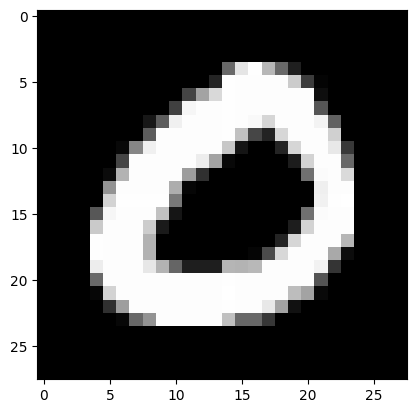

In [37]:
prediction = test_prediction(104, W1, b1, W2, b2)